# Project: Medical Appointment No Show

## 1. Introduction 
This [dataset](https://www.kaggle.com/joniarroba/noshowappointments) collects information from almost 100k medical appointments in Brazil and is **focused on the question of whether or not patients show up for their appointment.** A number of characteristics about the patient are included in each row.

* PatientId: Identification of a patient
* AppointmentID: Identification of each appointment
* Gender: Male or Female
* DataMarcacaoConsulta: The day of the actuall appointment, when they have to visit the doctor
* DataAgendamento: The day someone called or registered the appointment
* Age: How old is the patient
* Neighbourhood: Where the appointment takes place
* Scholarship: True or False, indicates if the patient is in the Bolsa Familia program
* Hipertension: True or False
* Diabetes: True or False
* Alcoholism: True or False
* Handcap: True or False
* SMS_received: 1 or more messages sent to the patient
* No-show "No" indicates if the patient showed up to their appointment and "Yes" if they didn't show up


In [7]:
# first let's add important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Import data from the file
df = pd.read_csv("KaggleV2-May-2016.csv")

In [8]:
#Check how the data looks like
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
# Check from which time periods these apointments are from
df.AppointmentDay.min(), df.AppointmentDay.max()

('2016-04-29T00:00:00Z', '2016-06-08T00:00:00Z')

In [10]:
# Check the shape of our data
df.shape

(110527, 14)

In [15]:
# Check missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


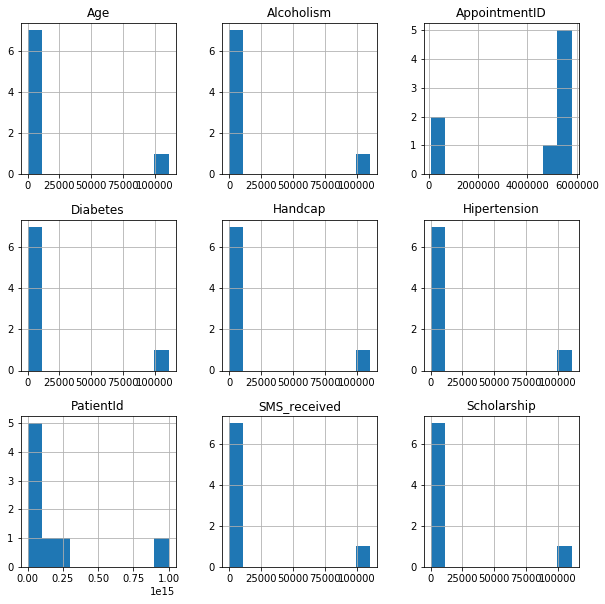

In [19]:
# Check numerical attributes
df.describe().hist(figsize=(10,10));

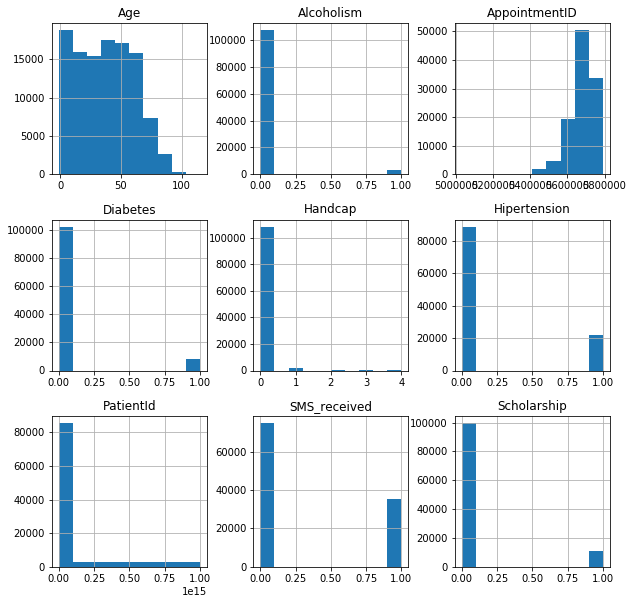

In [21]:
df.hist(figsize=(10,10));

# Observations
* We have 110,527 rows who are represnting our patients whereas 14 columns are patient's aattributes.
* These appointments are of 2 months from '2016-04-29' to '2016-06-08'.
* Avereage age of the patients is approximately 37.
* 9 percent of the patients does not have a scholarship
* On average patients suffers from, _Hipertension_ 19%, _Diabetes_ 7%, _Alcoholism_ 3% and _handicap_ 2%. 


# Questions
The questions that comes into my mind after my observation so far:

* a